<a href="https://colab.research.google.com/github/moni8210/Assignment-3/blob/main/obj_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow opencv_python

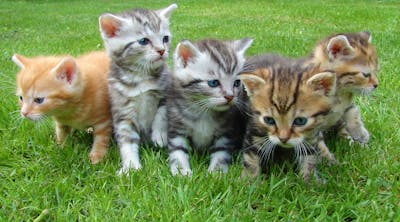

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import the Colab patch for cv2_imshow

image_path = '/content/kittens-cat-cat-puppy-rush-45170.jpeg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Check the file path and ensure the image exists.")
else:
    # Display the image using cv2_imshow
    cv2_imshow(image)
    # cv2.waitKey(0) and cv2.destroyAllWindows() are not needed with cv2_imshow

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

image_path = '/content/kittens-cat-cat-puppy-rush-45170.jpeg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Check the file path and ensure the image exists.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resize_image = cv2.resize(image, (224, 224))
    input_image = resize_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)


In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
predictions = model.predict(input_image)

1/1 [==============================] - 1s 1s/step


In [ ]:
# Assuming 'predictions' is already calculated from the previous step
# Decode the predictions to get human-readable labels
from tensorflow.keras.applications.resnet50 import decode_predictions

# Get the top 5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Print the predictions
for _, label, score in decoded_predictions:
    print(f"{label}: {score*100:.2f}%")

nematode: 13.60%
cleaver: 4.75%
oboe: 4.29%
spatula: 2.81%
ballpoint: 2.52%


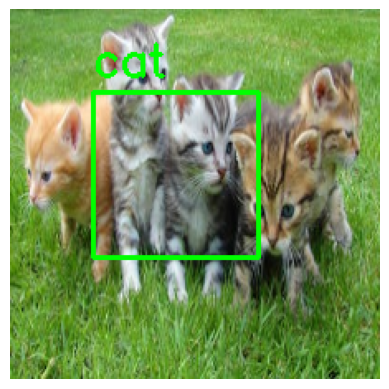

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (Your previous code for loading and resizing the image)

def draw_boxes(images, boxes, classes):
  for box, cls in zip(boxes, classes):
    y1, x1, y2, x2 = box
    cv2.rectangle(images, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(images, cls, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
  return images

boxes = [(50,50,150,150)]
classes = ['cat']
# Use the resized_image from your earlier code
result_image = draw_boxes(resize_image, boxes, classes)
plt.imshow(result_image)
plt.axis('off')
plt.show()



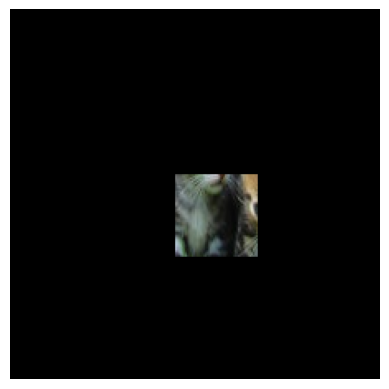

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (Your previous code for loading the image)

# Assuming 'image' is your original image, resize it here
resized_image = cv2.resize(image, (224, 224))

def run_segmantation_model(image):
  masks = np.zeros_like(image)
  masks[100:150, 100:150] = 1
  return masks

masks = run_segmantation_model(resized_image) # Use 'resized_image' here
segmented_images = resized_image * masks
plt.imshow(segmented_images) # Correct the typo here: 'segmented_images'
plt.axis('off')
plt.show()